### **Deploying Regression Models with PyCaret**
#### **Objective**
In this lab, we will use a **machine learning model trained on diamond features** to predict diamond prices.

#### **Scenario**
Imagine you work for a **jewelry company** that sells diamonds. Customers want to know the estimated price of a diamond based on its properties like **carat, cut, color, and clarity**. Instead of manually checking price charts, we will use **AI (LightGBM Model) to automate price predictions**.

#### **What Will Happen in This Lab?**
- Load a dataset of **diamond features**.
- Load a **pre-trained LightGBM regression model**.
- Prepare the dataset to **match model expectations**.
- Use the model to **predict diamond prices**.
- Understand the **output and how predictions work**.

---

### **Installing Required Libraries**
Before running any PyCaret functions, we need to **install the necessary libraries**. If PyCaret is already installed, you can skip this step.

#### **Why Install These?**
- **pandas** → Handles datasets.
- **pycaret** → Provides machine learning tools.
- **scikit-learn** → Supports model training.

#### **Step to Follow**
Run the command below to install them.

🔽 Run this command:


In [ ]:
!pip install pandas pycaret scikit-learn


### **Restarting the Kernel**
#### **Why Restart?**
- **Newly installed packages are not automatically recognized** in Jupyter.
- Restarting ensures that the **installed libraries work properly**.

#### **How to Restart?**
1. **Jupyter Notebook:** Click `Kernel` → `Restart Kernel & Run All`
🚀 **Once restarted, move to the next steps.**
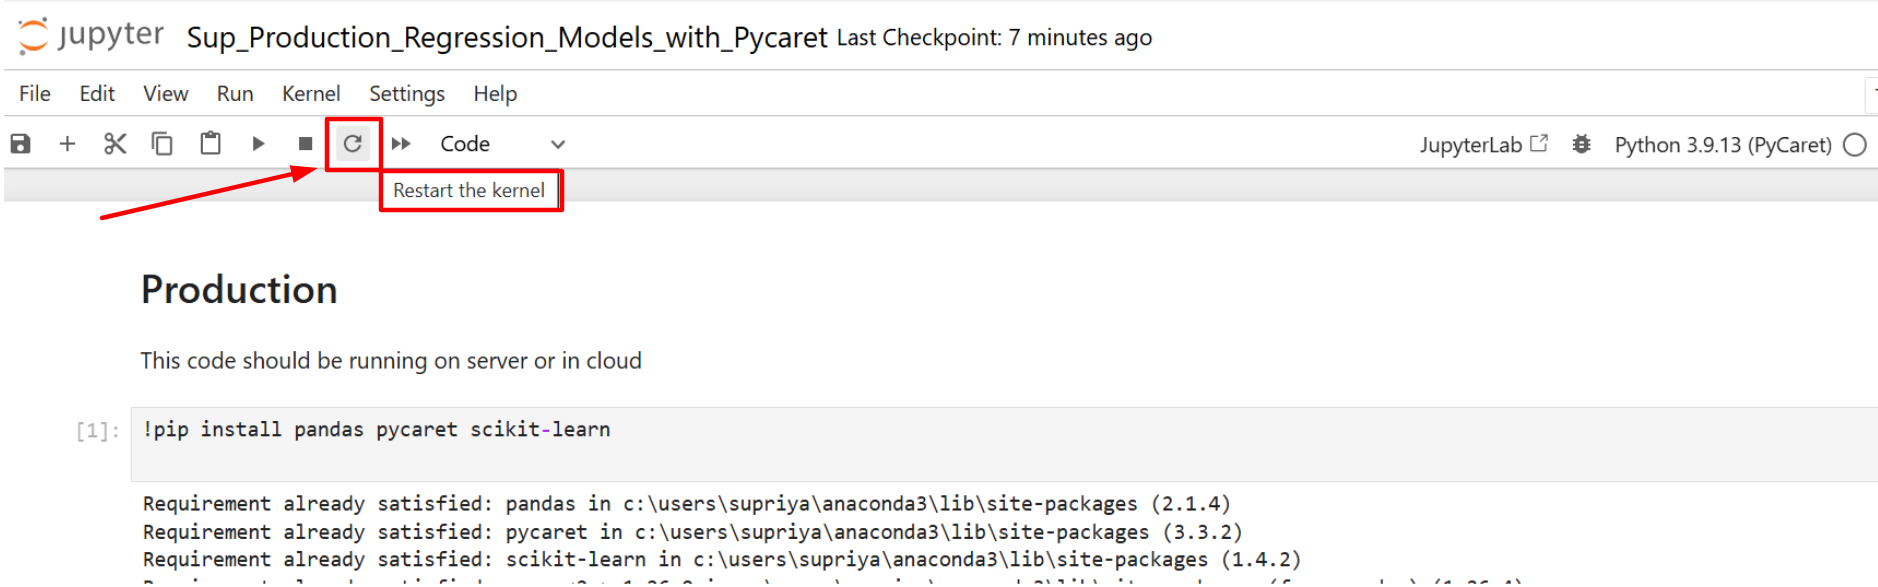

### **Loading and Exploring the Dataset**
We will now load the **diamond dataset**.

#### **Where is this dataset from?**
- This dataset comes from a **diamond pricing dataset** used in machine learning projects.
- It contains **properties of diamonds** like **carat, cut, color, clarity, and depth**.
- The goal is to predict the **price of a diamond** based on these features.

#### **Step to Follow**
Run the command below to **load and preview** the dataset.

🔽 Run this command:


In [ ]:
from pycaret.regression import *
import pandas as pd


🔽 Run this command:

In [ ]:
# Load dataset
diamond_data = pd.read_csv('diamond.csv', header=0, sep=',', engine='python')

🔽 Run this command:

In [ ]:
print(diamond_data.head())

   Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171


### **Loading the Pre-Trained Model**
#### **What is this model?**
- It is a **LightGBM regression model** trained on **diamond features**.
- It has already **learned how diamond prices are related to features**.

#### **Why Use a Pre-Trained Model?**
- Instead of training a model from scratch, we use a **ready-to-go model**.
- This saves time and lets us **focus on making predictions**.

#### **Step to Follow**
Run the command below to **load the model**.

🔽 Run this command:


In [ ]:
# Load trained model
saved_final_lightgbm = load_model('diamond-pipeline')

Transformation Pipeline and Model Successfully Loaded


### **Matching Dataset with Model's Expected Features**
#### **Why is this necessary?**
- Every trained model expects **specific features**.
- If we provide **extra/missing columns**, the model **won't work**.

#### **How do we fix this?**
- We check **which features the model needs**.
- We filter our dataset to **match those features**.

#### **Step to Follow**
Run the command below to ensure that **only required columns** are kept.

🔽 Run this command:


In [ ]:
# Get model's expected features
expected_features = list(saved_final_lightgbm.feature_names_in_)

🔽 Run this command:

In [ ]:
# Ensure dataset contains only the features required by the model
diamond_data = diamond_data[expected_features]

### **Making Predictions**
#### **How does prediction work?**
- We use the **pre-trained model** to **estimate diamond prices**.
- The model takes **input features** and predicts the **expected price**.

#### **What happens after running the next cell?**
- The dataset will go through the **LightGBM model**.
- A **new DataFrame** will be created with **predicted diamond prices**.

#### **Step to Follow**
Run the command below to **generate predictions**.

🔽 Run this command:


In [ ]:
# Make predictions
new_prediction = predict_model(saved_final_lightgbm, data=diamond_data)

🔽 Run this command:

In [ ]:
# Display results
print(new_prediction.head())

   Carat Weight    Cut Color Clarity Polish Symmetry Report  Price  \
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169   
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470   
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183   
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370   
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171   

   prediction_label  
0       4322.066964  
1       4948.143417  
2       4845.175534  
3       4481.116704  
4       4795.088672  


### **Understanding the Predictions Output**
The **output** of `predict_model()` contains:

1. **Original features** from the dataset.
2. **Predicted Price (Label Column)** → The estimated price.
